# Monitoria 2 - parte 01


Informações adicionais:

- [dfply](https://github.com/kieferk/dfply): facilitador para manipulação de dataframes.

- [yellowbrick](https://www.scikit-yb.org/en/latest/): visualização de modelos preditivos.

- Mais [estilo de gráficos](https://matplotlib.org/3.1.1/gallery/#style-sheets).


In [ ]:
# ativar o 'pipe' no python, denotado por >>, além de algumas outras funções para manipulação dos dados
!pip install dfply
# visualização de gráficos para machine learning
!pip install yellowbrick

In [ ]:
import pandas            as pd      # processamento de bancos de dados
import numpy             as np      # processamento numérico de bancos de dados
import matplotlib.pyplot as plt     # geração de gráficos
import seaborn           as sns     # alternativa para geração de gráficos
import operator                     # ordenação do zip
from   dfply             import *   # importar os comandos da biblioteca dfply
from   matplotlib        import rc  # configurações adicionais para os gráficos
import warnings                     # ignorando os warnings emitidos pelo Python
warnings.filterwarnings("ignore")

# estilo dos gráficos
plt.style.use("fivethirtyeight")
# formato das imagens
%config InlineBackend.figure_format = 'retina'
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})
rc('mathtext',**{'default':'regular'})

# semente de aleatoriedade (regra para o sorteio teste/treino)
np.random.seed(42)

# exibir os gráficos no notebook
%matplotlib inline

### Machine Learning com Scikit-Learn

A proposta da biblioteca [Scikit-Learn](https://scikit-learn.org) consiste em fornecer um conjunto de funcionalidades padronizadas, de modo a permitir com que especialistas das mais diversas áreas possam construir modelos de Machine Learning.



Além de bem documentados, os modelos de ML implementados na biblioteca Scikit-Learn são padronizados quanto ao input de dados e aos métodos disponíveis para a sua execução. Todos os modelos disponíveis na biblioteca aceitam entrada de dados na forma de arrays bidimensionais (observações x características).

In [ ]:
# split do conjunto de dados em treino/teste
from sklearn.model_selection import train_test_split

### Importando o conjunto de dados

Predizer qual a expectativa de vida dos munícipios brasileiros, dada sua situação socio-econômica.

In [ ]:
# o dataset está no Google Drive, em um CSV separado por ;
banco = pd.read_csv('https://drive.google.com/uc?export=download&id=1y6ESHpXVMd15a5aiJ4hVs412vmZmk_EV', sep = ';')

In [ ]:
# verificando as características básicas do conjunto de dados
banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cod_municipio          5565 non-null   int64  
 1   PopResid               5565 non-null   int64  
 2   ExpecVida              5565 non-null   float64
 3   idoso                  5565 non-null   float64
 4   mulher                 5565 non-null   float64
 5   nascimentopercapta     5565 non-null   float64
 6   casado                 5565 non-null   float64
 7   evangelico             5565 non-null   float64
 8   deficiente             5565 non-null   float64
 9   densidadepop           5565 non-null   float64
 10  geladeira              5565 non-null   float64
 11  moradorfavela          5565 non-null   float64
 12  pavimentacao           5565 non-null   float64
 13  brancos                5565 non-null   float64
 14  nvelsuperiorconcludo   5565 non-null   float64
 15  conc

In [ ]:
banco.tail(10)

,cod_municipio,PopResid,ExpecVida,idoso,mulher,nascimentopercapta,casado,evangelico,deficiente,densidadepop,...,nvelsuperiorconcludo,conclusoensinomdio,ResideMenos10anos,resideoutranacionalid,taxadedesemprego,taxatrabinfantil,horastrabalho,Gini,CobBFamilia,traboutromun
5555,5221601,36929,76.61,11.465244,50.07,15.83,34.24,18.96,27.46,17.24,...,7.80,21.74,8.359284,0.00,3.144563,14.240000,34.80,0.5751,73.580002,6.28
5556,5221700,13826,74.42,12.859829,49.33,10.88,41.69,29.15,26.83,26.46,...,4.98,17.36,4.976132,0.04,2.910252,19.290001,43.47,0.4820,88.989998,4.88
5557,5221809,3074,75.46,14.020820,49.19,7.62,41.08,19.35,18.07,4.90,...,10.48,26.00,7.026675,0.00,3.815176,11.220000,35.80,0.4951,90.730003,12.59
5558,5221858,132982,73.91,4.726956,51.40,17.75,33.03,30.76,20.41,2197.14,...,8.31,36.03,41.614655,0.09,4.964119,7.440000,27.86,0.5264,64.639999,53.55
5559,5221908,3659,73.76,14.867450,49.39,8.01,39.89,25.79,28.01,7.05,...,3.84,15.74,4.318120,0.00,3.736655,18.370001,47.62,0.4731,66.940002,5.07
5560,5222005,12548,74.10,11.204973,49.82,13.51,38.50,21.67,22.87,13.15,...,5.71,18.39,5.554670,0.13,2.341173,13.640000,38.85,0.4672,97.379997,3.24
5561,5222054,7371,73.25,7.787274,47.46,16.82,36.94,22.47,25.42,10.00,...,6.22,16.52,12.020079,0.03,3.994110,16.799999,60.03,0.4824,80.730003,3.26
5562,5222203,4735,74.07,6.166843,45.34,16.03,26.79,15.41,16.92,4.47,...,2.79,19.88,18.690602,0.00,4.956359,4.710000,46.63,0.4935,70.150002,2.62
5563,5222302,5145,73.09,11.448008,47.74,10.79,37.00,23.34,22.85,2.36,...,2.93,8.46,5.325559,0.00,2.267140,9.860000,46.71,0.5240,77.080002,7.36
5564,5300108,2570160,77.35,7.704267,52.19,16.88,33.56,26.88,22.33,444.07,...,24.01,31.53,18.913375,0.23,5.648448,6.590000,21.83,0.6370,31.639999,8.78


### Seleção de municípios com mais de 10.000 habitantes

Temos municípios muito pequenos no Brasil e isso leva a uma alta variabilidade aleatória. Por isso, iremos usar municípios com mais de 10 mil habitantes.

In [ ]:
# usamos os comandos mask e select da biblioteca dfply para filtrar o conjunto de dados
banco_filtrado = banco >> mask(X.PopResid > 10000) >> select(~X.PopResid)

In [ ]:
# para evitarmos a exibição dos dados em notacao científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
banco_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3052 entries, 0 to 5564
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cod_municipio          3052 non-null   int64  
 1   ExpecVida              3052 non-null   float64
 2   idoso                  3052 non-null   float64
 3   mulher                 3052 non-null   float64
 4   nascimentopercapta     3052 non-null   float64
 5   casado                 3052 non-null   float64
 6   evangelico             3052 non-null   float64
 7   deficiente             3052 non-null   float64
 8   densidadepop           3052 non-null   float64
 9   geladeira              3052 non-null   float64
 10  moradorfavela          3052 non-null   float64
 11  pavimentacao           3052 non-null   float64
 12  brancos                3052 non-null   float64
 13  nvelsuperiorconcludo   3052 non-null   float64
 14  conclusoensinomdio     3052 non-null   float64
 15  Resi

In [ ]:
# estatísticas básicas do conjuntos de dados
banco_filtrado.describe().T

,count,mean,std,min,25%,50%,75%,max
cod_municipio,3052.00,3116082.48,963249.11,1100015.00,2501881.25,3109808.00,3548527.25,5300108.00
ExpecVida,3052.00,72.98,2.78,65.55,70.85,73.26,75.22,78.64
idoso,3052.00,11.05,2.86,2.63,9.11,11.13,13.09,20.40
mulher,3052.00,49.88,1.41,38.71,49.13,50.04,50.82,54.24
nascimentopercapta,3052.00,14.98,3.30,5.97,12.73,14.54,16.78,35.17
casado,3052.00,34.26,8.10,6.55,29.04,35.11,40.61,53.42
evangelico,3052.00,18.30,9.16,2.03,11.04,17.26,24.45,77.26
deficiente,3052.00,24.19,4.13,10.19,21.32,24.06,26.88,38.79
densidadepop,3052.00,177.01,764.84,0.20,16.11,36.06,87.29,13024.60
geladeira,3052.00,87.49,12.26,27.98,80.47,91.57,97.56,100.00


### Separar conjunto de dados em treinamento e teste

In [ ]:
# variável de interesse
outcome = banco_filtrado >> select(X.ExpecVida)

In [ ]:
# removemos a coluna ExpecVida e cod_municipio do conjunto de dados
# (axis = 1 representa coluna. Inplace é para atualizar a variável)
banco_filtrado.drop(['ExpecVida', 'cod_municipio'], axis=1, inplace=True)

In [ ]:
# separação do conjunto de dados em treino/teste, com 30% dos dados para teste
X_train, X_test, y_train, y_test = train_test_split(banco_filtrado, outcome, test_size=0.3)

In [ ]:
X_train.shape

(2136, 21)

In [ ]:
X_test.shape

(916, 21)

In [ ]:
y_test.shape

(916, 1)

### Padronização dos dados de treino e teste

In [ ]:
# importamos a função StandardScaler para padronização dos dados
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
# Obtemos as estatisticas necessárias para a padronização a partir do conjunto de treinamento
sc.fit(X_train)

StandardScaler()

In [ ]:
sc.mean_

array([1.10561543e+01, 4.98942837e+01, 1.49378184e+01, 3.42582303e+01,
       1.82862219e+01, 2.42233287e+01, 1.81528408e+02, 8.75928324e+01,
       1.64096442e-01, 4.90191217e-01, 4.34871980e+01, 6.06676966e+00,
       1.76000234e+01, 5.67030998e+00, 9.04447566e-02, 4.18480011e+00,
       1.18368539e+01, 2.82110627e+01, 5.19769569e-01, 7.21900001e+01,
       1.06729728e+01])

In [ ]:
sc.var_

array([8.09619436e+00, 2.04428628e+00, 1.04890282e+01, 6.47029621e+01,
       8.26843722e+01, 1.66546761e+01, 5.83174730e+05, 1.46619610e+02,
       1.46157517e-01, 5.81145837e-02, 5.22026125e+02, 1.56467106e+01,
       4.18157665e+01, 2.12401665e+01, 7.31295307e-02, 3.31229428e+00,
       3.67994759e+01, 8.64506828e+01, 3.63776334e-03, 3.92491316e+02,
       1.13289150e+02])

In [ ]:
# padronizamos o conjunto de treinamento
X_train = pd.DataFrame(sc.transform(X_train), columns=X_train.columns)

In [ ]:
# padronizamos o conjunto de teste
X_test = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

In [ ]:
# tabela descritiva dos dados de treino
X_train.describe()

,idoso,mulher,nascimentopercapta,casado,evangelico,deficiente,densidadepop,geladeira,moradorfavela,pavimentacao,...,nvelsuperiorconcludo,conclusoensinomdio,ResideMenos10anos,resideoutranacionalid,taxadedesemprego,taxatrabinfantil,horastrabalho,Gini,CobBFamilia,traboutromun
count,2136.00,2136.00,2136.00,2136.00,2136.00,2136.00,2136.00,2136.00,2136.00,2136.00,...,2136.00,2136.00,2136.00,2136.00,2136.00,2136.00,2136.00,2136.00,2136.00,2136.00
mean,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,...,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.96,-7.82,-2.77,-3.32,-1.79,-3.44,-0.24,-4.76,-0.43,-1.99,...,-1.43,-2.03,-1.22,-0.33,-2.11,-1.81,-2.61,-3.56,-3.64,-1.00
25%,-0.67,-0.51,-0.69,-0.67,-0.80,-0.70,-0.22,-0.58,-0.43,-0.81,...,-0.76,-0.76,-0.61,-0.33,-0.68,-0.75,-0.62,-0.67,-0.59,-0.62
50%,0.03,0.12,-0.13,0.11,-0.11,-0.04,-0.19,0.33,-0.35,-0.11,...,-0.24,-0.13,-0.25,-0.26,-0.16,-0.20,-0.00,-0.04,0.21,-0.34
75%,0.72,0.65,0.53,0.79,0.68,0.64,-0.12,0.82,0.02,0.80,...,0.51,0.67,0.28,-0.00,0.55,0.52,0.62,0.64,0.73,0.23
max,3.29,3.04,6.25,2.22,6.49,3.57,16.82,1.02,18.93,2.09,...,7.02,3.54,8.70,20.85,6.94,6.11,3.27,4.78,1.40,5.11


In [ ]:
# tabela descritiva dos dados de teste
X_test.describe()

,idoso,mulher,nascimentopercapta,casado,evangelico,deficiente,densidadepop,geladeira,moradorfavela,pavimentacao,...,nvelsuperiorconcludo,conclusoensinomdio,ResideMenos10anos,resideoutranacionalid,taxadedesemprego,taxatrabinfantil,horastrabalho,Gini,CobBFamilia,traboutromun
count,916.00,916.00,916.00,916.00,916.00,916.00,916.00,916.00,916.00,916.00,...,916.00,916.00,916.00,916.00,916.00,916.00,916.00,916.00,916.00,916.00
mean,-0.01,-0.04,0.05,-0.00,0.00,-0.03,-0.02,-0.03,0.03,-0.04,...,-0.03,-0.01,-0.03,-0.04,0.03,0.02,-0.04,-0.01,0.05,-0.00
std,1.01,0.96,1.06,1.02,1.02,1.04,1.01,1.04,1.02,1.03,...,0.95,1.06,0.97,0.71,1.06,1.04,1.01,1.02,0.97,0.99
min,-2.70,-5.91,-2.19,-3.44,-1.76,-3.01,-0.24,-4.92,-0.43,-1.97,...,-1.38,-2.43,-1.20,-0.33,-1.96,-1.75,-2.66,-2.96,-3.56,-0.99
25%,-0.70,-0.61,-0.68,-0.61,-0.80,-0.75,-0.22,-0.64,-0.43,-0.87,...,-0.73,-0.84,-0.62,-0.33,-0.69,-0.72,-0.69,-0.66,-0.57,-0.64
50%,0.02,0.04,-0.12,0.09,-0.12,-0.05,-0.19,0.33,-0.38,-0.18,...,-0.29,-0.18,-0.29,-0.26,-0.12,-0.22,-0.06,0.03,0.32,-0.36
75%,0.70,0.62,0.66,0.80,0.66,0.66,-0.13,0.83,0.04,0.81,...,0.44,0.66,0.23,-0.00,0.51,0.56,0.59,0.65,0.74,0.24
max,2.78,2.70,6.07,2.38,5.89,3.03,15.54,1.02,10.01,2.02,...,5.04,4.62,6.56,9.83,7.03,8.47,3.81,4.46,1.40,4.85


### Regressão Ridge

[Scikit-learn Ridge](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

In [ ]:
# importamos as funções Ridge e RidgeCV
from sklearn.linear_model import RidgeCV, Ridge

# métrica de avaliação
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# geramos valores para Alpha.
# linspace cria uma sequência de números uniformemente espaçados entre os limites dados
alphas = 10**np.linspace(-10,5,200)
alphas

array([1.00000000e-10, 1.18953407e-10, 1.41499130e-10, 1.68318035e-10,
       2.00220037e-10, 2.38168555e-10, 2.83309610e-10, 3.37006433e-10,
       4.00880633e-10, 4.76861170e-10, 5.67242607e-10, 6.74754405e-10,
       8.02643352e-10, 9.54771611e-10, 1.13573336e-09, 1.35099352e-09,
       1.60705282e-09, 1.91164408e-09, 2.27396575e-09, 2.70495973e-09,
       3.21764175e-09, 3.82749448e-09, 4.55293507e-09, 5.41587138e-09,
       6.44236351e-09, 7.66341087e-09, 9.11588830e-09, 1.08436597e-08,
       1.28989026e-08, 1.53436841e-08, 1.82518349e-08, 2.17111795e-08,
       2.58261876e-08, 3.07211300e-08, 3.65438307e-08, 4.34701316e-08,
       5.17092024e-08, 6.15098579e-08, 7.31680714e-08, 8.70359136e-08,
       1.03532184e-07, 1.23155060e-07, 1.46497140e-07, 1.74263339e-07,
       2.07292178e-07, 2.46581108e-07, 2.93316628e-07, 3.48910121e-07,
       4.15040476e-07, 4.93704785e-07, 5.87278661e-07, 6.98587975e-07,
       8.30994195e-07, 9.88495905e-07, 1.17584955e-06, 1.39871310e-06,
      

In [ ]:
# criamos o modelo de regressão ridge
ridge = Ridge()
coefs = []
scores = np.empty_like(alphas)

for i,a in enumerate(alphas):
    # definimos o valor de alpha
    ridge.set_params(alpha = a, fit_intercept=True)
    # fazemos o ajuste do modelo aos dados
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    y_pred = ridge.predict(X_test)
    # verificamos o desempenho sob o conjunto de teste
    scores[i] = np.sqrt(mean_squared_error(y_test, y_pred))

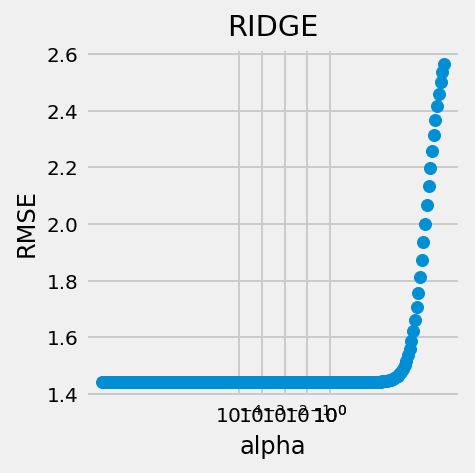

In [ ]:
# visualizando o RMSE em função do alpha
plt.figure(figsize=(3,3))
plt.scatter(alphas, scores)
plt.ylabel('RMSE')
plt.xlabel('alpha')
plt.xscale('log')
plt.title('RIDGE')
plt.xticks([1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1])
plt.show()

In [ ]:
# função para verificar o peso dos coeficientes em função do alpha
def weight_versus_alpha_plot(weight, alphas, features):

    fig = plt.figure(figsize = (15, 10))

    weight = np.array(weight)

    for col in range(weight.shape[2]):

         plt.plot(alphas, weight[:, :,col], label = features[col])

    plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)


    plt.legend(bbox_to_anchor = (1.3, 0.9))
    plt.title('Coefficient Weight as Alpha Grows - Ridge')
    plt.ylabel('Coefficient weight')
    plt.xlabel('alpha')
    plt.xscale('log')
    return fig

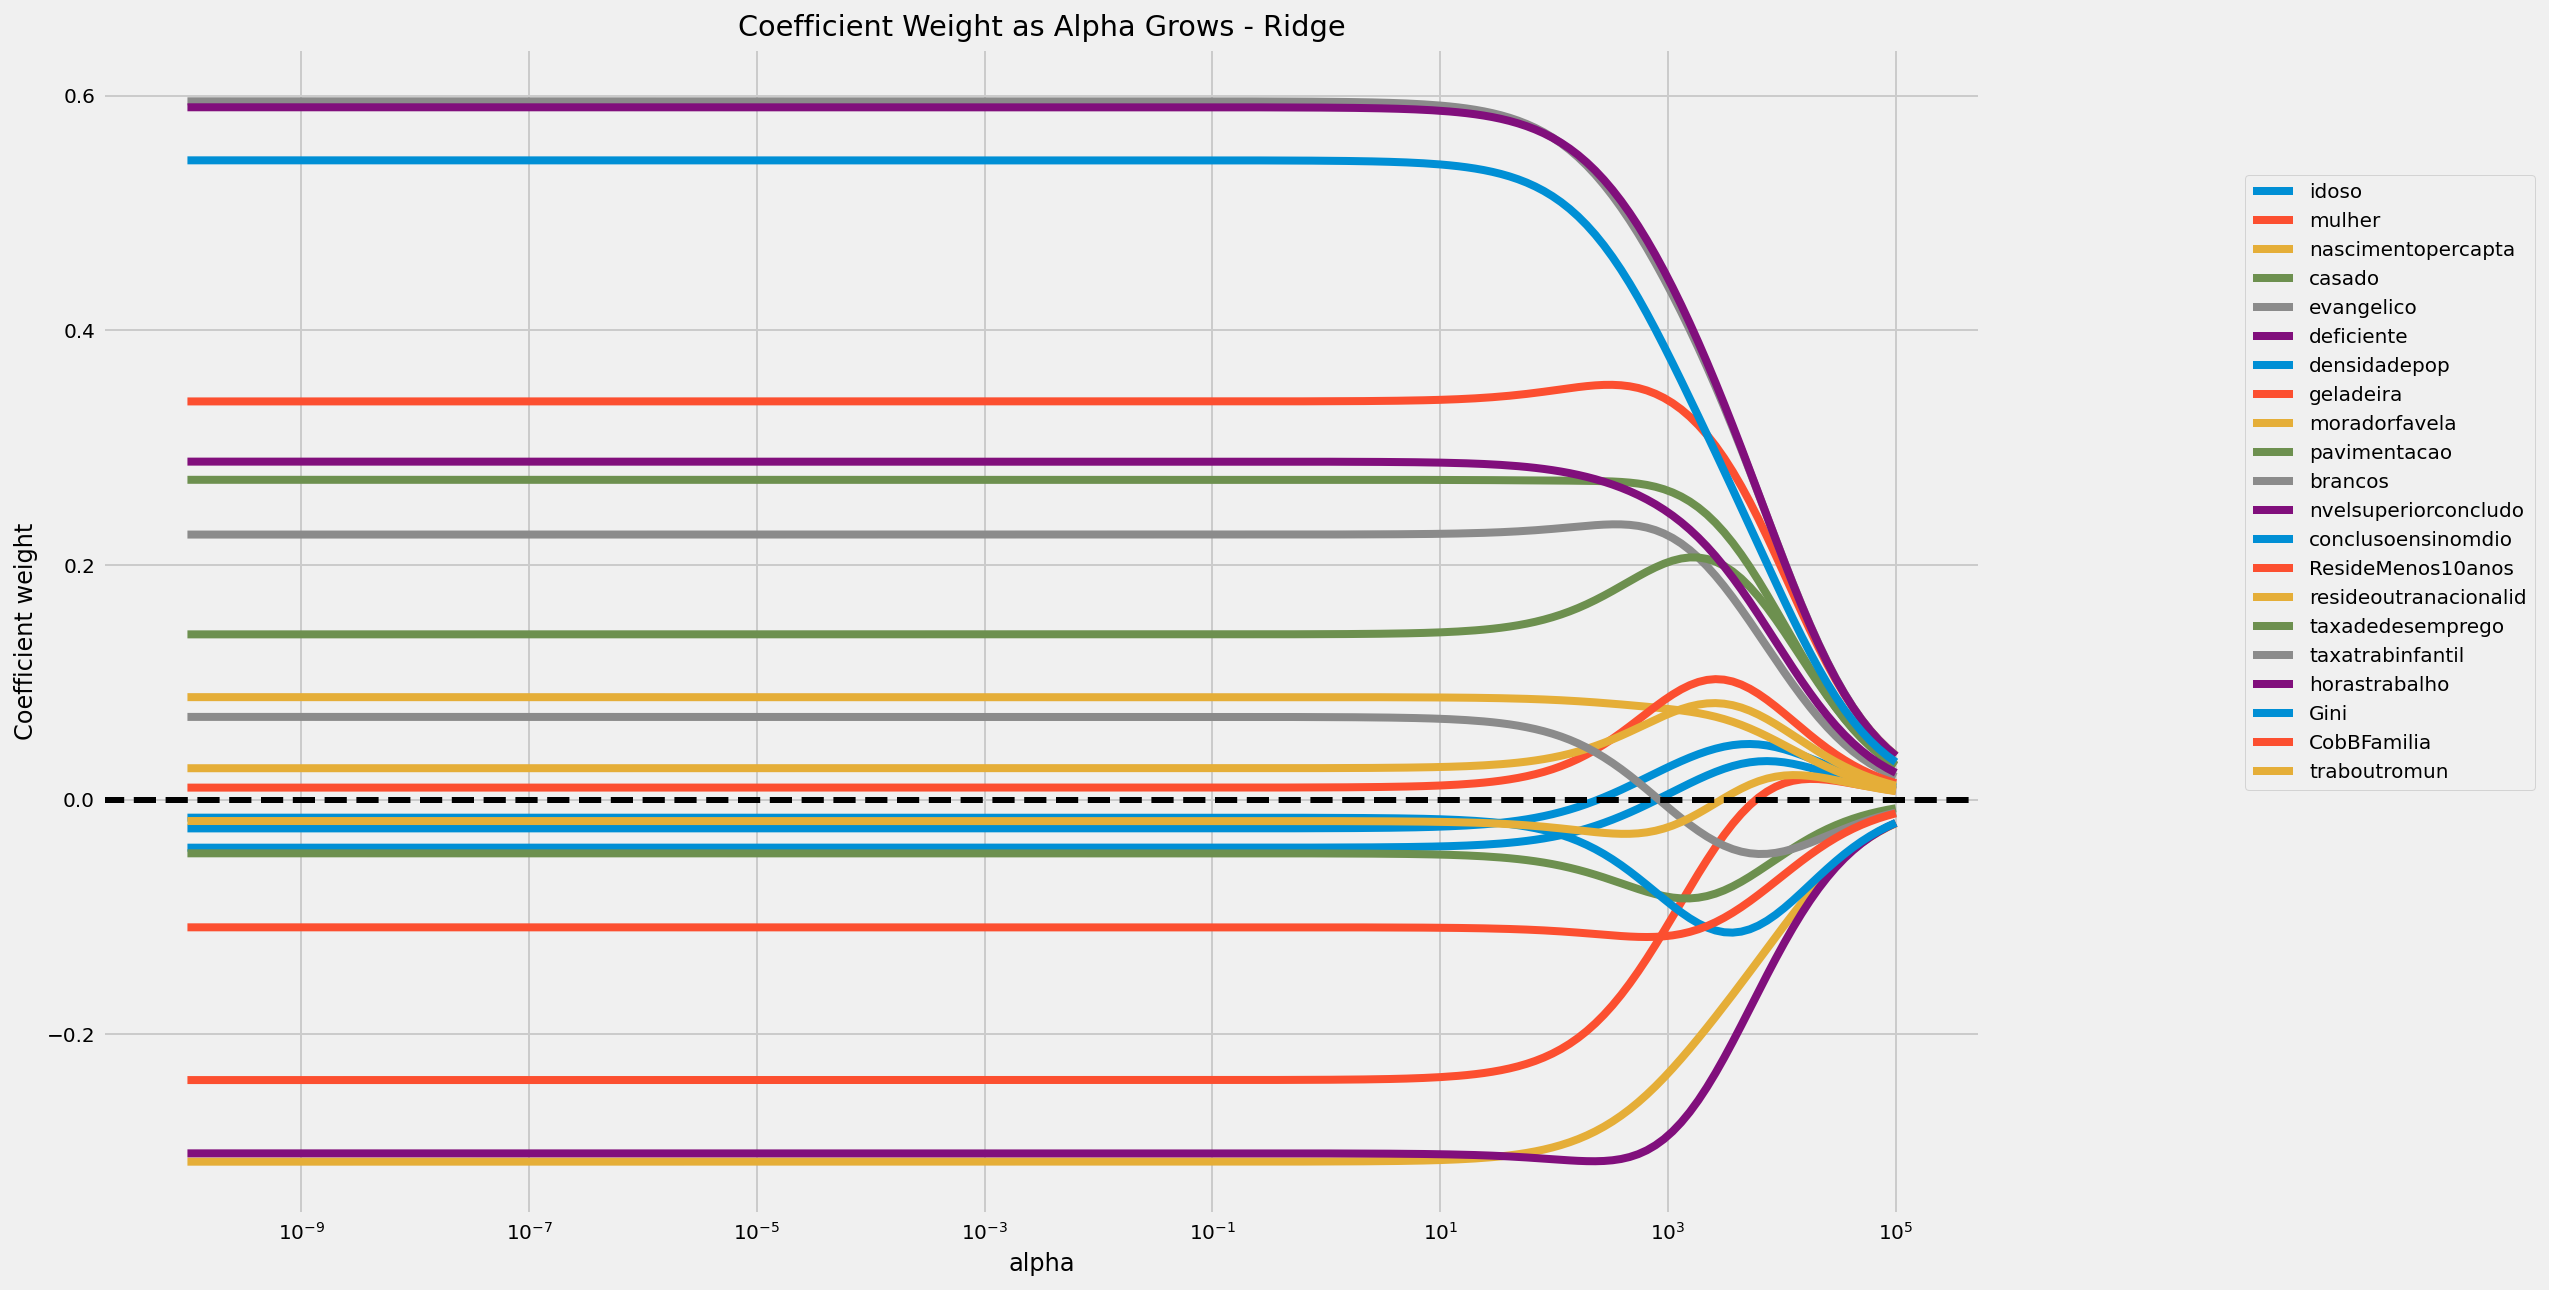

In [ ]:
ridge_fig = weight_versus_alpha_plot(coefs, alphas, list(X_train.columns))

Encontrando o melhor valor para alpha por meio da validação cruzada no conjunto de treinamento

In [ ]:
lr_ridge = RidgeCV(alphas=[0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.02, 0.03, 0.05], cv=10 )

In [ ]:
lr_ridge.fit(X_train, y_train)

RidgeCV(alphas=array([0.001, 0.002, 0.003, 0.004, 0.005, 0.01 , 0.02 , 0.03 , 0.05 ]),
        cv=10)

In [ ]:
lr_ridge.alpha_

0.05

In [ ]:
lr_ridge.score(X_train, y_train)

0.7255101604390881

In [ ]:
pred_train_lr_ridge= lr_ridge.predict(X_train)
print('RMSE (treino):', np.sqrt(mean_squared_error(y_train,pred_train_lr_ridge)))
print('R² (treino):', r2_score(y_train, pred_train_lr_ridge))

pred_test_lr_ridge= lr_ridge.predict(X_test)
print('RMSE (teste):',np.sqrt(mean_squared_error(y_test,pred_test_lr_ridge)))
print('R² (teste):', r2_score(y_test, pred_test_lr_ridge))

RMSE (treino): 1.4604923332476356
R² (treino): 0.7255101604390881
RMSE (teste): 1.4430572607943073
R² (teste): 0.7253643080662082


In [ ]:
# exibindo a equação gerada
eq = " y_pred (ridge) = " + str(lr_ridge.intercept_[0]) + "\n"
for c, coef in sorted(zip(X_train.columns, lr_ridge.coef_.ravel()), key=operator.itemgetter(1), reverse=True):
  print(f'{c}  = {coef}')
  eq = eq + (" + " if coef > 0 else " ") + str(coef) + "*" + str(c) + "\n"

print("\n\n")
print(eq)

brancos  = 0.5952569360293447
nvelsuperiorconcludo  = 0.5901796097098245
conclusoensinomdio  = 0.5449406811385826
geladeira  = 0.3394040861604893
horastrabalho  = 0.28807421949692896
casado  = 0.2725754869919554
evangelico  = 0.22588816926367414
pavimentacao  = 0.14080505256450873
moradorfavela  = 0.08726811273373464
taxatrabinfantil  = 0.0704154882279294
resideoutranacionalid  = 0.026668572977761422
ResideMenos10anos  = 0.010135903932184423
Gini  = -0.015494943514429184
traboutromun  = -0.01835420012106728
idoso  = -0.024623649686055887
densidadepop  = -0.04107025319802458
taxadedesemprego  = -0.045893644322985504
CobBFamilia  = -0.10898156425287212
mulher  = -0.23920083550867052
deficiente  = -0.30170716652986473
nascimentopercapta  = -0.3087921037043893



 y_pred (ridge) = 72.99965823970037
 + 0.5952569360293447*brancos
 + 0.5901796097098245*nvelsuperiorconcludo
 + 0.5449406811385826*conclusoensinomdio
 + 0.3394040861604893*geladeira
 + 0.28807421949692896*horastrabalho
 + 0.272575